In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltl



# Importing the Dataset


In [2]:
data = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Taking Care of Missing Values


<Axes: >

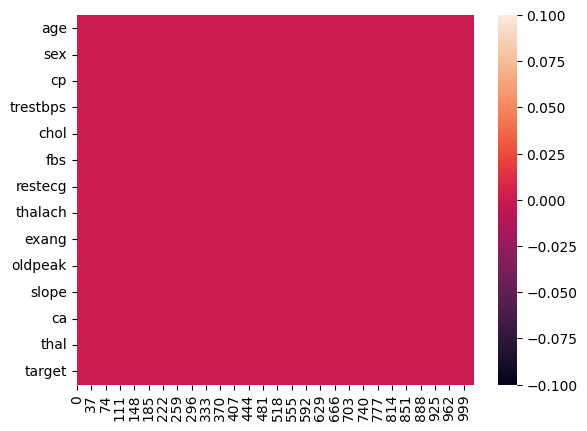

In [4]:
sns.heatmap(data.T.isnull())

# Taking Care of Duplicate Values


In [5]:
data.duplicated().any()

True

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().any()

False

In [8]:
data.shape

(302, 14)

# Data Processing

In [9]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Encoding Categorical Data

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data["cp"].unique()

array([0, 1, 2, 3])

In [14]:
cate_val.remove("sex")
cate_val.remove("target")

In [15]:
data = pd.get_dummies(data=data, columns=cate_val, drop_first=True)

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# Feature Scaling


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# Splitting The Dataset Into The Training Set And Test Set

In [20]:
X = data.drop("target", axis=1)

In [21]:
y = data["target"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression


In [24]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = log.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.7868852459016393

# SVC

In [30]:
from sklearn.svm import SVC

In [31]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [32]:
y_pred2 = svm.predict(X_test)

In [33]:
accuracy_score(y_true=y_test, y_pred=y_pred2)

0.8032786885245902

# KNeighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [36]:
y_pred3 = knn.predict(X_test)

In [37]:
accuracy_score(y_true=y_test, y_pred=y_pred3)

0.8032786885245902

# Non-Linear ML Algorithms

In [38]:
data = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
data.drop_duplicates(inplace=True)

In [39]:
X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred4 = dt.predict(X_test)

In [43]:
accuracy_score(y_true=y_test, y_pred=y_pred4)

0.7704918032786885

# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred5 = rf.predict(X_test)

In [47]:
accuracy_score(y_true=y_test, y_pred=y_pred5)

0.8524590163934426

# Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [50]:
y_pred6 = gbc.predict(X_test)

In [51]:
accuracy_score(y_true=y_test, y_pred=y_pred6)

0.8032786885245902

# BarPlot


In [52]:
final_data = pd.DataFrame(
    data={
        "Models": ["LR", "SVM", "KNN", "DT", "RF", "GB"],
        "ACC": [
            accuracy_score(y_true=y_test, y_pred=y_pred),
            accuracy_score(y_true=y_test, y_pred=y_pred2),
            accuracy_score(y_true=y_test, y_pred=y_pred3),
            accuracy_score(y_true=y_test, y_pred=y_pred4),
            accuracy_score(y_true=y_test, y_pred=y_pred5),
            accuracy_score(y_true=y_test, y_pred=y_pred6)
        ]
    }
)
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.803279
3,DT,0.770492
4,RF,0.852459
5,GB,0.803279


# DATA VIZ

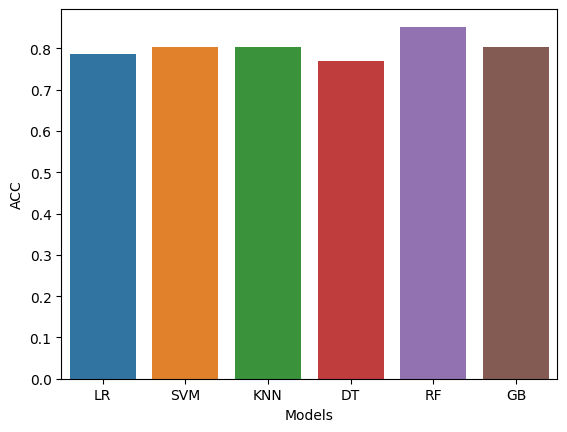

In [53]:
sns.barplot(data=final_data, x="Models", y="ACC");

In [54]:
X = data.drop("target", axis=1)
y = data["target"]

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

# Prediction on New Data

In [56]:

new_data = pd.DataFrame(
    data={
     'age': 52,
     'sex': 1,
     'cp': 0,
     'trestbps': 125,
     'chol': 212,
     'fbs': 0,
     'restecg': 1,
     'thalach': 168,
     'exang': 0,
     'oldpeak': 1,
     'slope': 2,
     'ca': 2,
     'thal': 3,
    },
    index=[0]
)
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1,2,2,3


In [57]:
p = rf.predict(new_data)
if p[0] == 0: print("No Disease")
else: print("Disease")

No Disease


# Save Model Usign Joblib

In [58]:
import joblib

In [59]:
joblib.dump(rf, "model_")

['model_']